In [12]:
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import mplfinance as mpf

# style
plt.style.use("fivethirtyeight")

In [2]:
# Loading Stocks data
df = pd.read_csv("streaming_stocks_data.csv")
df.columns = ['timestamp','last_price','volume','scrip_id']
df.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [3]:
df = df.set_index(pd.DatetimeIndex(df['timestamp'].values))
df.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [4]:
df1 = df[0:374]
df1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [5]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [6]:
for i in SMAs:
    df1["SMA_"+str(i)]= df1['last_price'].rolling(window=i).mean()

C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df1.index:
    SMA_short = df1['SMA_20']
    SMA_long = df1['SMA_50']
    close = df1['last_price'][i]
    
    if(SMA_short[i] > SMA_long[i]):                               # line 9
        print('Up trend')
        if(position==0):
            buyP=close   # buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)                           # line 23
    if(counter==df1["last_price"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Up trend
Buy at the price101.35
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Down trend
Sell at the price101.8
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Do

In [8]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df1.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2020-08-03 09:16:00+05:30 up to now with 3 trades:
SMAs used: [20, 50]
Total return over 3 trades: -0.35%


In [9]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 0.44400592007893813
Average Loss: -0.39525730293522576
Max Return: 0.44400592007893813
Max Loss: -0.39564787339266827
Gain/loss ratio: 1.1233338809471693


In [10]:
if(numGains>0 or numLosses>0):
    batAvg=numGains/(numGains+numLosses)
else:
    batAvg=0
print("Batting Avg: "+ str(batAvg))

Batting Avg: 0.3333333333333333


In [20]:
stock = "Live Data"

In [21]:
mpf.plot(df1, type = 'ohlc',figratio=(16,6), mav=(short_sma,long_sma), 
         volume=True, title= str(stock), style='default')

KeyError: 'Open'

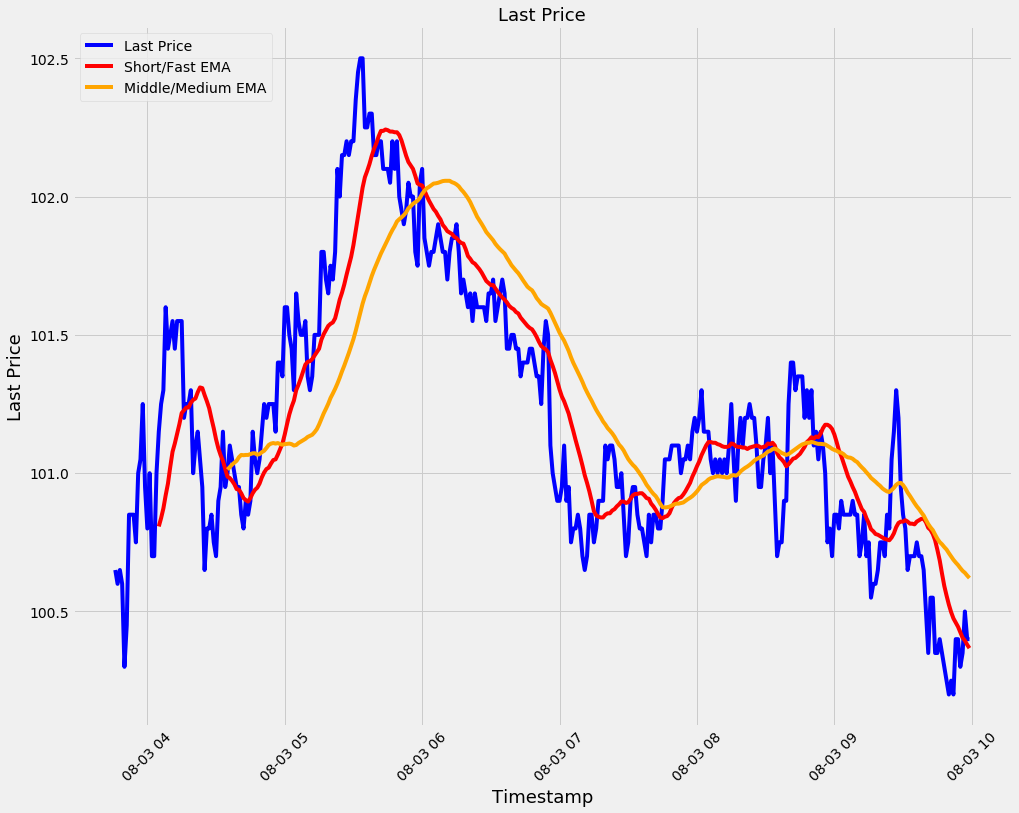

In [14]:
# Visualize the Last Price and the exponential moving averages
plt.figure(figsize=(15,12))
plt.title('Last Price', fontsize=18)
plt.plot(df1['last_price'], label='Last Price', color='blue')
plt.plot(SMA_short, label='Short/Fast EMA', color='red')
plt.plot(SMA_long, label='Middle/Medium EMA', color='orange')

plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()